In [1]:
import pandas as pd
import numpy as np

## Importing Dataset

In [2]:
data = pd.read_csv("mushrooms.csv")

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Checking Dataset

In [4]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
data.shape

(8124, 23)

In [6]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## Visualization

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Poisions VS Edible')

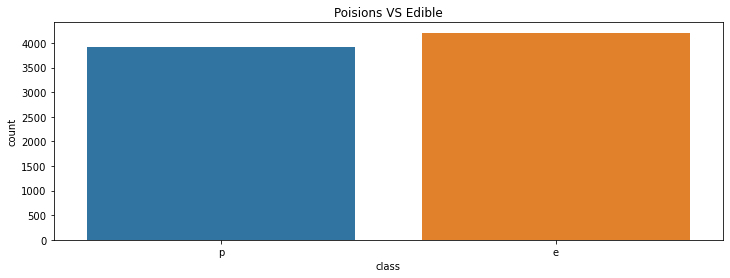

In [8]:
plt.figure(figsize=(12,4))
sns.countplot(x='class',data=data)
plt.title("Poisions VS Edible")

Text(0.5, 1.0, 'Population count')

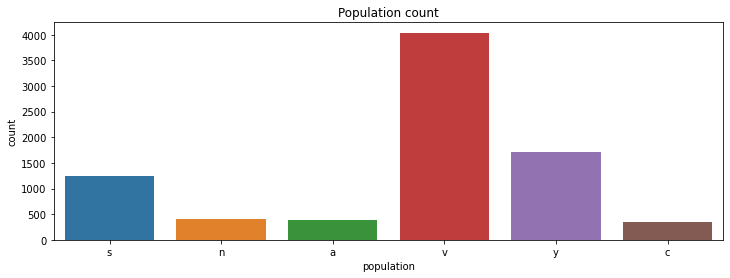

In [9]:
plt.figure(figsize=(12,4))
sns.countplot(x='population',data=data)
plt.title("Population count")

Text(0.5, 1.0, 'Mushroom habitat')

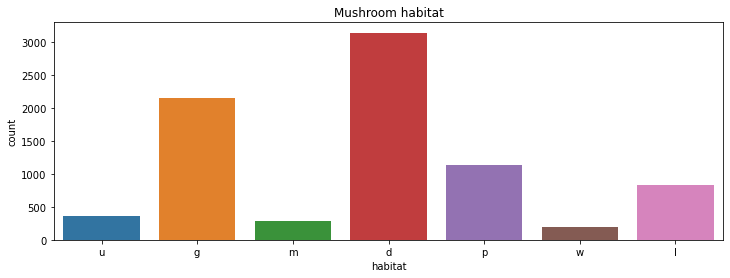

In [10]:
plt.figure(figsize=(12,4))
sns.countplot(x='habitat',data=data)
plt.title("Mushroom habitat")

### Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

In [12]:
data.head(1)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5


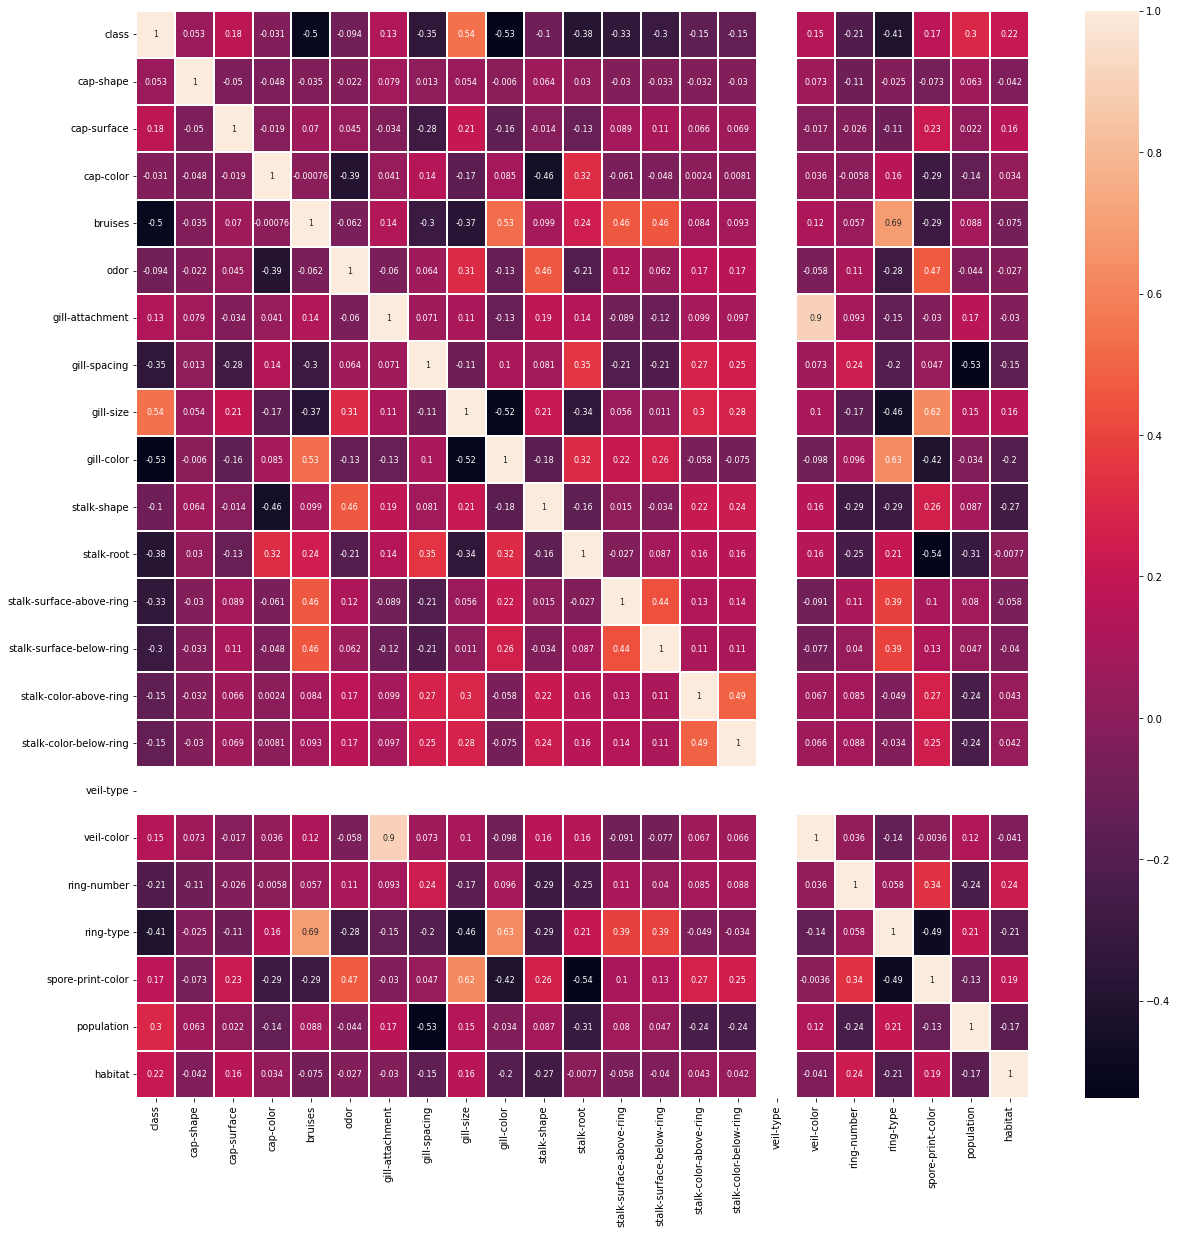

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),linewidths=.1, annot=True, annot_kws={"size": 8})
plt.yticks(rotation=0);

In [14]:
data = data.drop(["veil-type"],axis=1)

In [15]:
from sklearn.model_selection import train_test_split
X = data.drop(['class'], axis=1)
y = data["class"]
X_train, X_test, y_train,y_test = train_test_split(X, y, random_state=42, test_size=0.7)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,confusion_matrix,classification_report,accuracy_score

In [17]:
dt_model=DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print(' Classification Report\n',classification_report(y_test,y_pred))

Confusion Matrix
 [[2905    0]
 [   0 2782]]
 Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2905
           1       1.00      1.00      1.00      2782

    accuracy                           1.00      5687
   macro avg       1.00      1.00      1.00      5687
weighted avg       1.00      1.00      1.00      5687



In [18]:
accuracy_score(y_test,y_pred)

1.0

Decision Tree is giving 100 percent accuracy

In [19]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print('Classification Report\n',classification_report(y_test,y_pred))

Confusion Matrix
 [[2784  121]
 [ 155 2627]]
Classification Report
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      2905
           1       0.96      0.94      0.95      2782

    accuracy                           0.95      5687
   macro avg       0.95      0.95      0.95      5687
weighted avg       0.95      0.95      0.95      5687



C:\Python\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
accuracy_score(y_test,y_pred)

0.9514682609460172

Logistic Regression classification is having 95% accuracy

In [23]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

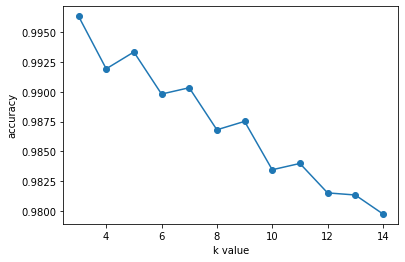

In [24]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [27]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print("Accuracy is:", accuracy_score(y_test,y_pred))
print("f1 score is:", f1_score(y_test,y_pred))

Accuracy is: 0.9933180938983647
f1 score is: 0.993135838150289


In [28]:
confusion_matrix(y_test,y_pred)

array([[2900,    5],
       [  33, 2749]], dtype=int64)

KNN classifier have 99% accuracy

In [29]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [30]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 1])

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)

In [32]:
accuracy_score(y_test,y_pred)

0.9201688060488834

In [33]:
cm

array([[2648,  257],
       [ 197, 2585]], dtype=int64)

Naive Bayes have 92% accuracy